Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

Import csv file

In [2]:
df = pd.read_csv("Sample_Dataset.csv")

In [3]:
df.head(10) #Show top 10 values from the top

,sound_level,light_intensity,temperature,humidity,label
0,259,618,26.30,63.7,1
1,316,610,26.42,63.6,1
2,257,602,26.29,63.6,1
3,304,619,26.43,63.7,1
4,261,599,26.42,63.6,1
5,260,617,26.30,63.6,1
6,334,608,26.42,63.6,1
7,282,604,26.29,63.6,1
8,261,621,26.43,63.6,1
9,259,599,26.42,63.7,1


In [4]:
df.isnull().any() #Check for any null values in dataset

sound_level        False
light_intensity    False
temperature        False
humidity           False
label              False
dtype: bool

In [5]:
df.dtypes #Check the variable types for our variables

sound_level          int64
light_intensity      int64
temperature        float64
humidity           float64
label                int64
dtype: object

In [6]:
df.describe()

,sound_level,light_intensity,temperature,humidity,label
count,2964.000000,2964.000000,2964.000000,2964.000000,2964.000000
mean,299.781039,548.492578,26.826582,61.018843,1.000337
std,33.229506,208.931424,2.149183,1.801118,0.816428
min,257.000000,252.000000,0.000000,56.500000,0.000000
25%,273.000000,273.000000,26.510000,59.400000,0.000000
50%,291.000000,608.000000,26.550000,61.800000,1.000000
75%,321.000000,768.000000,27.630000,62.300000,2.000000
max,559.000000,772.000000,28.500000,63.700000,2.000000


Everything checks out. But temperature seems to have a minimum value of 0.0

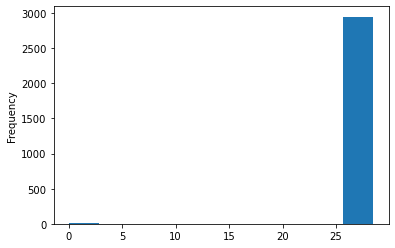

In [7]:
df['temperature'].plot.hist()

Plotting a histogram for temperature, most of the values are above 25 degree celcius and 0 appears less frequently.

In [8]:
X = df.iloc[:, :4] #Features
X

,sound_level,light_intensity,temperature,humidity
0,259,618,26.30,63.7
1,316,610,26.42,63.6
2,257,602,26.29,63.6
3,304,619,26.43,63.7
4,261,599,26.42,63.6
...,...,...,...,...
2959,295,768,28.38,56.5
2960,295,768,28.38,56.5
2961,343,770,28.38,56.5
2962,295,769,28.38,56.5


In [9]:
Y = df.iloc[:, 4:] #Labels
Y

,label
0,1
1,1
2,1
3,1
4,1
...,...
2959,2
2960,2
2961,2
2962,2


Separated the features and labels from the dataframe. Now we can split the training and test sets.

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7)

In [11]:
from sklearn.svm import SVC

In [12]:
clf = SVC(C=1e4, kernel='rbf', random_state=100, gamma='scale',probability=True)
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)

C:\Users\MAVERICK\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


1.0

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [14]:
clf2 = DecisionTreeClassifier()
clf2.fit(X_train, Y_train)
clf2.score(X_train, Y_train)

1.0

[Text(200.88000000000002, 181.2, 'X[1] <= 696.0\ngini = 0.667\nsamples = 2074\nvalue = [673, 702, 699]'),
 Text(133.92000000000002, 108.72, 'X[1] <= 438.5\ngini = 0.5\nsamples = 1375\nvalue = [673, 702, 0]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 673\nvalue = [673, 0, 0]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 702\nvalue = [0, 702, 0]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 699\nvalue = [0, 0, 699]')]

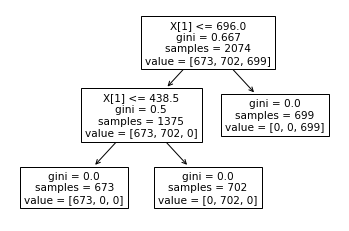

In [15]:
tree.plot_tree(clf2)

In [16]:
Example = [[300, 200, 27.0, 80.0]] #Dim
Example1 = [[500, 500, 24.0, 60.0]] #Normal
Example2 = [[100, 800, 22.0, 70.0]] #Bright

In [17]:
def classifier (Data):
    Label = clf2.predict(Data)
    Label = Label[0] #Used this to get the int value from the 1D list
    Dict = {0: 'Dim', 1: 'Normal', 2: 'Bright'}
    Class = Dict.get(Label)
    print(Label, Class)

In [18]:
classifier(Example)
classifier(Example1)
classifier(Example2)

0 Dim
1 Normal
2 Bright
